# Scrape Movie Genres Data

In [285]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome()

all_data = []

for year in range(2000, 2026):   # 2000 to 2025
    url = f"https://www.the-numbers.com/market/{year}/genres"
    driver.get(url)
    time.sleep(1)   # let page load
    
    # find all tables on the page
    tables = driver.find_elements(By.TAG_NAME, "table")
    
    # usually the 3rd table is "Market Share for Each Genre"
    genre_table = tables[1]
    
    rows = genre_table.find_elements(By.TAG_NAME, "tr")
    
    # skip the header row
    for row in rows[1:]:
        cols = row.find_elements(By.TAG_NAME, "td")
        if len(cols) == 6:   # rank, genre, movies, gross, tickets, share
            rank = cols[0].text
            genre = cols[1].text
            movies = cols[2].text
            gross = cols[3].text
            tickets = cols[4].text
            share = cols[5].text
            
            if genre.lower() not in ["total", "totals"]:  # skip totals row
                all_data.append([year, rank, genre, movies, gross, tickets, share])
    
    print(f"Finished {year}")

driver.quit()

# put into dataframe
df = pd.DataFrame(all_data, columns=["year","rank","genre","movies","gross","tickets","share"])
print(df.head())

df.to_csv("Movie_Genre_2000_2025.csv", index=False)

Finished 2000
Finished 2001
Finished 2002
Finished 2003
Finished 2004
Finished 2005
Finished 2006
Finished 2007
Finished 2008
Finished 2009
Finished 2010
Finished 2011
Finished 2012
Finished 2013
Finished 2014
Finished 2015
Finished 2016
Finished 2017
Finished 2018
Finished 2019
Finished 2020
Finished 2021
Finished 2022
Finished 2023
Finished 2024
Finished 2025
   year rank              genre movies           gross      tickets   share
0  2000    1             Comedy     86  $1,698,441,791  315,109,795  22.48%
1  2000    2              Drama    168  $1,609,402,386  298,590,421  21.30%
2  2000    3          Adventure     29  $1,300,212,239  241,226,762  17.21%
3  2000    4             Action     32  $1,216,436,533  225,683,957  16.10%
4  2000    5  Thriller/Suspense     36    $649,948,058  120,584,055   8.60%


# Import Data

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

genres = pd.read_csv("/Users/hazel/Desktop/DATA 400/Final_Mini_Project/Movie_Genre_2000_2025.csv")
unemployment = pd.read_csv("/Users/hazel/Desktop/DATA 400/Final_Mini_Project/Monthly_Unemployment_Rate.csv")
gdp = pd.read_csv("/Users/hazel/Desktop/DATA 400/Final_Mini_Project/Quarterly_GDP.csv")

print(genres.head())
print(unemployment.head())
print(gdp.head())

   year  rank              genre  movies           gross      tickets   share
0  2000     1             Comedy      86  $1,698,441,791  315,109,795  22.48%
1  2000     2              Drama     168  $1,609,402,386  298,590,421  21.30%
2  2000     3          Adventure      29  $1,300,212,239  241,226,762  17.21%
3  2000     4             Action      32  $1,216,436,533  225,683,957  16.10%
4  2000     5  Thriller/Suspense      36    $649,948,058  120,584,055   8.60%
  observation_date  UNRATE
0       2000-01-01     4.0
1       2000-02-01     4.1
2       2000-03-01     4.0
3       2000-04-01     3.8
4       2000-05-01     4.0
  observation_date        GDP
0       1999-01-01  13315.597
1       1999-04-01  13426.748
2       1999-07-01  13604.771
3       1999-10-01  13827.980
4       2000-01-01  13878.147


# Data Cleaning

In [325]:
#Clean Genres Data
df = pd.read_csv("/Users/hazel/Desktop/DATA 400/Final_Mini_Project/Movie_Genre_2000_2025.csv")

#Convert gross, tickets, and share into numbers
df["gross_usd"] = pd.to_numeric(df["gross"].str.replace("$", "").str.replace(",", ""), errors="coerce")
df["tickets_count"] = pd.to_numeric(df["tickets"].str.replace(",", ""), errors="coerce")
df["share_prop"] = pd.to_numeric(df["share"].str.replace("%", ""), errors="coerce") / 100
df["share_prop"] = df["share_prop"].round(3)

print(df.isna().sum())      # see if there are missing values
print(df.groupby("year")["share_prop"].sum())  # check if shares per year ≈ 1.0

df.to_csv("Movie_Genre_2000_2025_clean.csv", index=False)

#No missing values in any column
#Genre shares sum to 100% each year 

year             0
rank             0
genre            0
movies           0
gross            0
tickets          0
share            0
gross_usd        0
tickets_count    0
share_prop       0
dtype: int64
year
2000    0.999
2001    1.000
2002    0.997
2003    0.998
2004    1.001
2005    0.999
2006    1.001
2007    0.999
2008    1.002
2009    0.999
2010    1.000
2011    0.999
2012    1.000
2013    1.001
2014    0.999
2015    1.000
2016    1.000
2017    1.000
2018    1.000
2019    1.000
2020    0.999
2021    0.998
2022    0.999
2023    0.999
2024    1.000
2025    0.998
Name: share_prop, dtype: float64


In [299]:
#unemployment data
unemployment["year"] = pd.to_datetime(unemployment["observation_date"]).dt.year

unemp_annual = (unemployment.groupby("year", as_index=False)
                .agg(unemp_rate_avg=("UNRATE","mean"))
                .sort_values("year"))

unemp_annual["unemp_rate_avg"] = unemp_annual["unemp_rate_avg"].round(2)

print(unemp_annual.head())

unemp_annual.to_csv("Avg_unem_rate_clean.csv", index=False)

   year  unemp_rate_avg
0  2000            3.97
1  2001            4.74
2  2002            5.78
3  2003            5.99
4  2004            5.54


In [301]:
#gdp data
gdp["year"] = pd.to_datetime(gdp["observation_date"]).dt.year
gdp_annual = (gdp.groupby("year", as_index=False)
              .agg(GDP_annual_avg=("GDP","mean"))
              .sort_values("year"))

gdp_annual["GDP_growth"] = gdp_annual["GDP_annual_avg"].pct_change() * 100
gdp_annual["GDP_annual_avg"] = gdp_annual["GDP_annual_avg"].round(2)
gdp_annual["GDP_growth"] = gdp_annual["GDP_growth"].round(2)

print(gdp_annual.head())

gdp_annual.to_csv("Avg_gdp_growth.csv", index=False)

   year  GDP_annual_avg  GDP_growth
0  1999        13543.77         NaN
1  2000        14096.03        4.08
2  2001        14230.73        0.96
3  2002        14472.71        1.70
4  2003        14877.31        2.80


# Merge Dataset

In [327]:
import pandas as pd

genres = pd.read_csv("/Users/hazel/Desktop/DATA 400/Final_Mini_Project/Movie_Genre_2000_2025_clean.csv")
unemploy = pd.read_csv("/Users/hazel/Desktop/DATA 400/Final_Mini_Project/Avg_unem_rate_clean.csv")
gdp = pd.read_csv("/Users/hazel/Desktop/DATA 400/Final_Mini_Project/Avg_gdp_growth.csv")

print(gdp.head())
print(unemploy.head())
print(genres.head())

   year  GDP_annual_avg  GDP_growth
0  1999        13543.77         NaN
1  2000        14096.03        4.08
2  2001        14230.73        0.96
3  2002        14472.71        1.70
4  2003        14877.31        2.80
   year  unemp_rate_avg
0  2000            3.97
1  2001            4.74
2  2002            5.78
3  2003            5.99
4  2004            5.54
   year  rank              genre  movies           gross      tickets   share  \
0  2000     1             Comedy      86  $1,698,441,791  315,109,795  22.48%   
1  2000     2              Drama     168  $1,609,402,386  298,590,421  21.30%   
2  2000     3          Adventure      29  $1,300,212,239  241,226,762  17.21%   
3  2000     4             Action      32  $1,216,436,533  225,683,957  16.10%   
4  2000     5  Thriller/Suspense      36    $649,948,058  120,584,055   8.60%   

    gross_usd  tickets_count  share_prop  
0  1698441791      315109795       0.225  
1  1609402386      298590421       0.213  
2  1300212239      24122

In [329]:
# merge each data based on year
merged = (genres
          .merge(gdp, on="year", how="left")
          .merge(unemploy, on="year", how="left")
          .sort_values("year"))

print(merged.head())

merged.to_csv("Merged_Data.csv", index=False)

    year  rank                genre  movies           gross      tickets  \
0   2000     1               Comedy      86  $1,698,441,791  315,109,795   
11  2000    12  Concert/Performance       2     $38,847,717    7,207,369   
10  2000    11         Black Comedy       9     $62,630,861   11,619,825   
9   2000    10              Western       5     $64,721,752   12,007,746   
7   2000     8          Documentary      47    $127,633,911   23,679,763   

     share   gross_usd  tickets_count  share_prop  GDP_annual_avg  GDP_growth  \
0   22.48%  1698441791      315109795       0.225        14096.03        4.08   
11   0.51%    38847717        7207369       0.005        14096.03        4.08   
10   0.83%    62630861       11619825       0.008        14096.03        4.08   
9    0.86%    64721752       12007746       0.009        14096.03        4.08   
7    1.69%   127633911       23679763       0.017        14096.03        4.08   

    unemp_rate_avg  
0             3.97  
11            

In [331]:
#Label downturn gdp
merged["downturn_gdp"] = (merged["GDP_growth"] < 0).astype(int)

print(merged[["year","GDP_growth","downturn_gdp"]].head(15))

merged.to_csv("Merged_Downturn_GDP.csv", index=False)

    year  GDP_growth  downturn_gdp
0   2000        4.08             0
11  2000        4.08             0
10  2000        4.08             0
9   2000        4.08             0
7   2000        4.08             0
6   2000        4.08             0
8   2000        4.08             0
4   2000        4.08             0
3   2000        4.08             0
2   2000        4.08             0
1   2000        4.08             0
5   2000        4.08             0
19  2001        0.96             0
23  2001        0.96             0
22  2001        0.96             0


In [333]:
# Most popular genre each year 

merged_df = pd.read_csv("/Users/hazel/Desktop/DATA 400/Final_Mini_Project/Merged_Downturn_GDP.csv")

pop_genre = (
   merged_df.sort_values(["year", "share_prop"], ascending=[True, False])
      .groupby("year", as_index=False)
      .first()[["year","genre","share_prop","downturn_gdp"]]
      .rename(columns={"genre":"top_genre","share_prop":"top_share"})
)

print(pop_genre.head(15))

pop_genre.to_csv("Top_Genre_Each_Year.csv", index=False)

    year  top_genre  top_share  downturn_gdp
0   2000     Comedy      0.225             0
1   2001  Adventure      0.264             0
2   2002  Adventure      0.312             0
3   2003     Action      0.235             0
4   2004  Adventure      0.307             0
5   2005  Adventure      0.261             0
6   2006  Adventure      0.297             0
7   2007  Adventure      0.311             0
8   2008  Adventure      0.304             0
9   2009  Adventure      0.254             1
10  2010  Adventure      0.289             0
11  2011  Adventure      0.248             0
12  2012     Action      0.246             0
13  2013  Adventure      0.268             0
14  2014     Action      0.308             0


# Data Exploratory

In [337]:
# Set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

df = pd.read_csv("/Users/hazel/Desktop/DATA 400/Final_Mini_Project/Merged_Downturn_GDP.csv")

if "share_prop" in df.columns:
    SHARE_COL = "share_prop"
elif "share_frac" in df.columns:
    SHARE_COL = "share_frac"
else:
    raise ValueError("Couldn't find a share column")

required = ["year", "genre", SHARE_COL, "unemp_rate_avg", "GDP_growth"]
missing = [ c for c in required if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in Merged_downturn_gdp.csv: {missing}")

recession_years = [2001, 2007, 2008, 2009, 2020]
if "downturn_recess" not in df.columns:
    df["downturn_recess"] = df["year"].isin(recession_years).astype(int)

## Correlations per genre(with unemployment and GDP growth)

In [340]:
genres_list = sorted(df["genre"].unique().tolist())

rows = []
for g in genres_list:
    sub = df[df["genre"] == g].copy()
    corr_unemp = sub[SHARE_COL].corr(sub["unemp_rate_avg"])
    corr_gdp   = sub[SHARE_COL].corr(sub["GDP_growth"])
    rows.append([g, corr_unemp, corr_gdp])

corr_table = pd.DataFrame(rows, columns=["genre", "corr_with_unemp", "corr_with_gdp_growth"])
corr_table["corr_with_unemp"] = corr_table["corr_with_unemp"].round(3)
corr_table["corr_with_gdp_growth"] = corr_table["corr_with_gdp_growth"].round(3)

print(corr_table.sort_values("corr_with_unemp", ascending=False).to_string(index=False))

corr_table.to_csv("Corr_per_genre.csv", index=False)

              genre  corr_with_unemp  corr_with_gdp_growth
  Thriller/Suspense            0.501                -0.489
    Romantic Comedy            0.343                -0.185
            Western            0.341                 0.146
              Drama            0.270                -0.135
          Adventure            0.256                -0.464
        Documentary            0.177                 0.121
             Comedy            0.120                 0.080
       Black Comedy            0.109                -0.288
    Multiple Genres            0.039                -0.302
Concert/Performance           -0.066                 0.026
             Action           -0.286                 0.325
             Horror           -0.363                 0.131
            Reality           -0.431                -0.398
            Musical           -0.462                 0.139
        Educational              NaN                   NaN


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


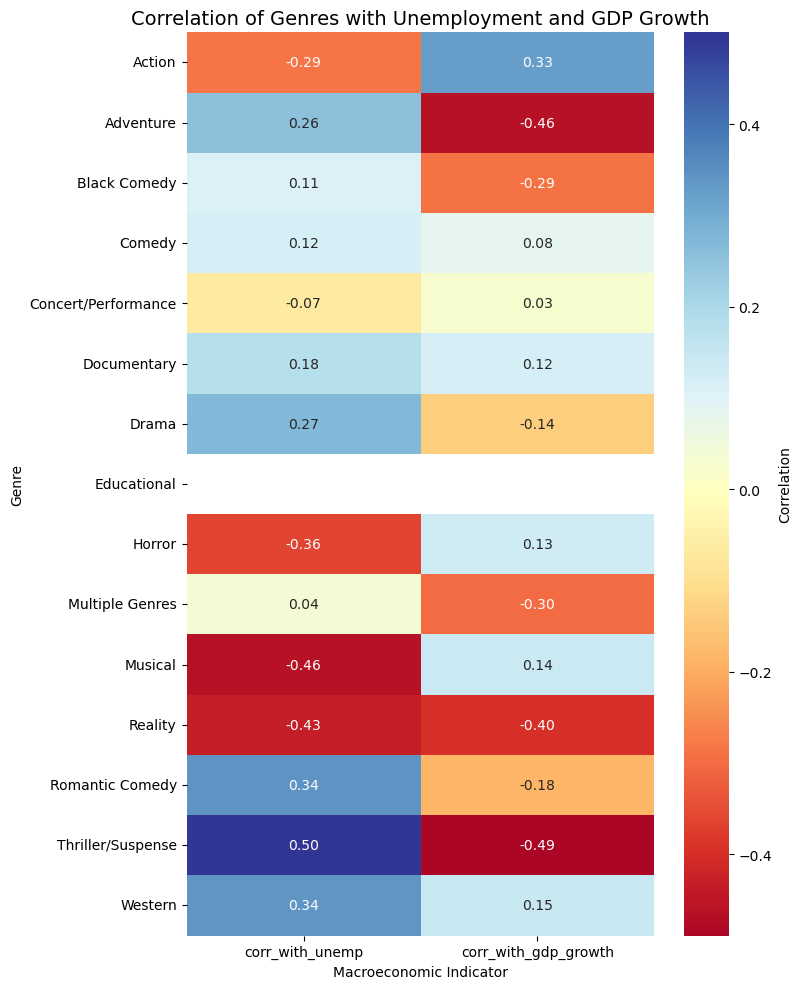

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for heatmap
heatmap_data = corr_table.set_index("genre")[["corr_with_unemp", "corr_with_gdp_growth"]]

# Plot heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="RdYlBu",
    center=0,
    cbar_kws={'label': 'Correlation'},
    fmt=".2f"
)
plt.title("Correlation of Genres with Unemployment and GDP Growth", fontsize=14)
plt.ylabel("Genre")
plt.xlabel("Macroeconomic Indicator")
plt.tight_layout()

# Save heatmap
plt.show()

## Recession vs. Normal Average

In [367]:
avg_by_condition = (
    df.groupby(["genre", "downturn_recess"])[SHARE_COL]
      .mean().reset_index()
      .pivot(index="genre", columns="downturn_recess", values=SHARE_COL)
      .rename(columns={0: "normal_avg", 1: "recession_avg"})
)

avg_by_condition["recession_minus_normal"] = (
    avg_by_condition["recession_avg"] - avg_by_condition["normal_avg"]
)

avg_pct = (avg_by_condition * 100).round(2)
avg_pct = avg_pct.sort_values("recession_minus_normal", ascending=False)

print(avg_pct.to_string())

avg_pct.to_csv("Avg_Recession_Normal.csv", index=False)

downturn_recess      normal_avg  recession_avg  recession_minus_normal
genre                                                                 
Adventure                 24.97          29.34                    4.37
Thriller/Suspense          6.73           9.88                    3.15
Comedy                    12.73          14.90                    2.17
Romantic Comedy            3.29           5.10                    1.81
Drama                     12.82          13.44                    0.62
Multiple Genres            0.00           0.12                    0.12
Educational                0.00           0.00                    0.00
Black Comedy               1.04           0.98                   -0.06
Concert/Performance        0.30           0.22                   -0.08
Documentary                0.90           0.78                   -0.12
Western                    0.67           0.40                   -0.27
Horror                     7.03           5.74                   -1.29
Musica

## Bar Chart

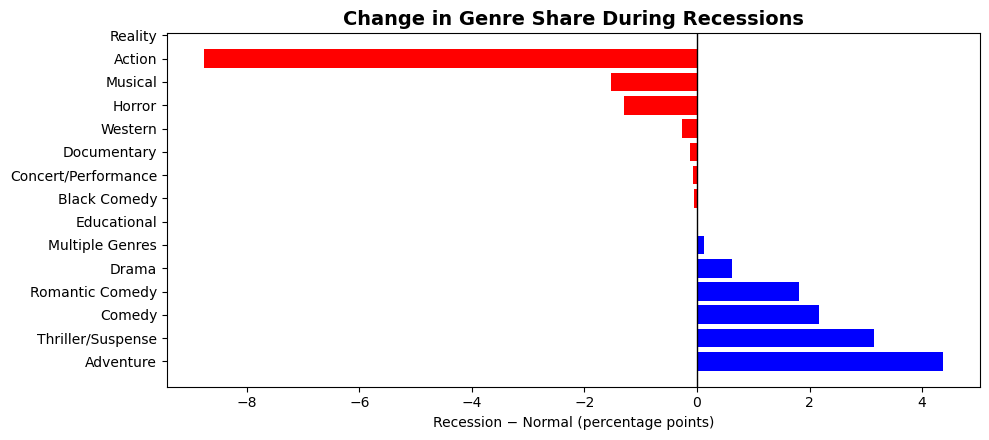

In [374]:
import matplotlib.pyplot as plt

colors = ["Blue" if x > 0 else "Red" for x in avg_pct["recession_minus_normal"]]

plt.figure(figsize=(10, max(4, len(avg_pct)*0.3)))
plt.barh(avg_pct.index, avg_pct["recession_minus_normal"], color=colors)
plt.axvline(0, color="black", linewidth=1)
plt.xlabel("Recession − Normal (percentage points)")
plt.title("Change in Genre Share During Recessions", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

## Time Series Plots with Recessions

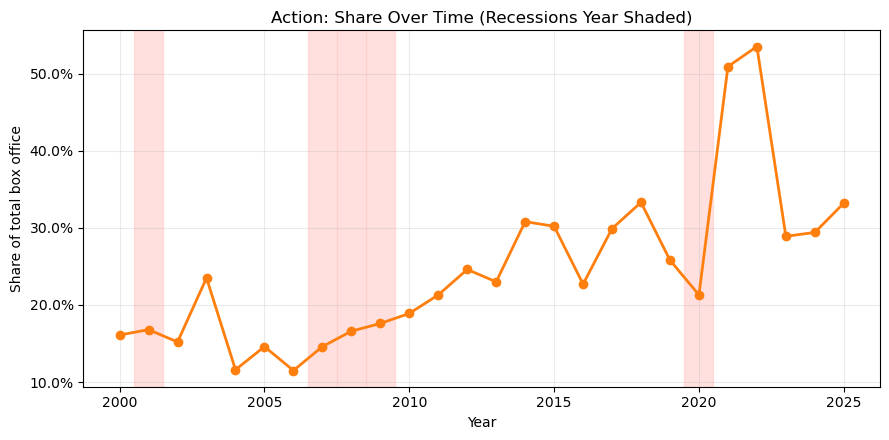

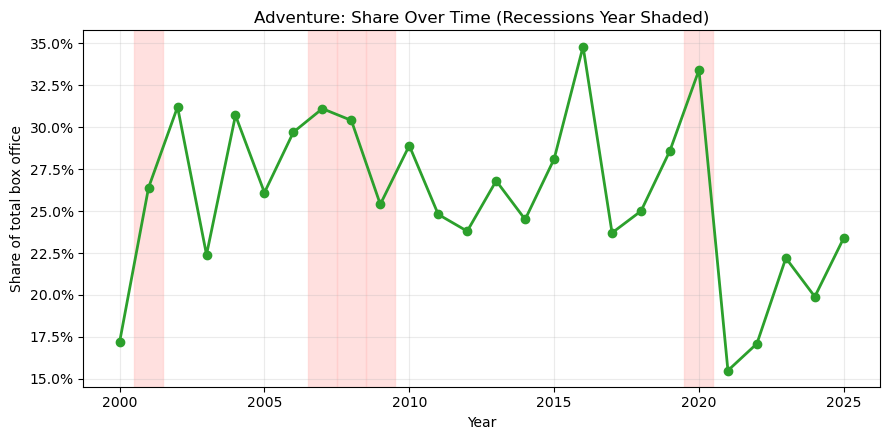

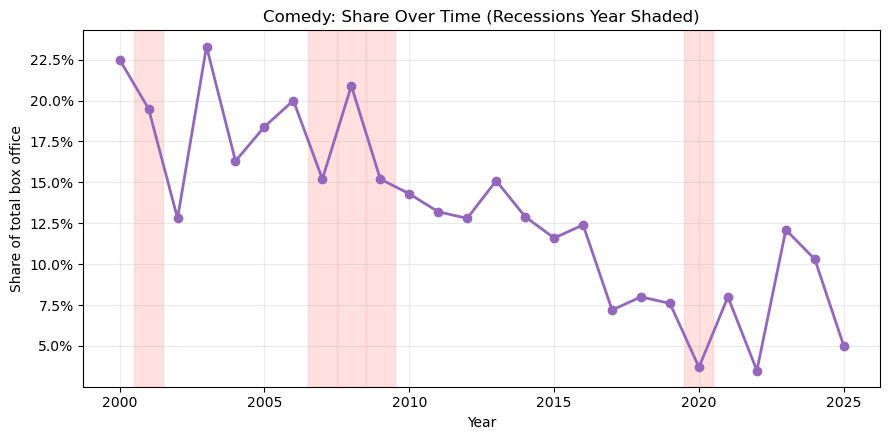

In [383]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

share_wide = (
    df.pivot_table(index="year", columns="genre", values=SHARE_COL, aggfunc="mean")
      .sort_index()
)

recessions_by_year = df.groupby("year", as_index=False)["downturn_recess"].max()
flag_map = dict(zip(recessions_by_year["year"].values,
                    recessions_by_year["downturn_recess"].values))


plot_list = [g for g in ["Action", "Adventure", "Comedy"] if g in share_wide.columns]
color_map = {"Action": "tab:orange", "Adventure": "tab:green", "Comedy": "tab:purple"}

def plot_genre_share_recessions(wide_df, genre_name):
    if genre_name not in wide_df.columns:
        print(f"{genre_name} not found.")
        return
    years = wide_df.index.values

    plt.figure(figsize=(9, 4.5))
    plt.plot(years, wide_df[genre_name], marker="o",
             label=genre_name, linewidth=2,
             color=color_map.get(genre_name, None))

    for y in years:
        if flag_map.get(int(y), 0) == 1:
            plt.axvspan(y-0.5, y+0.5, color="#FFCCCB", alpha=0.6)

    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1.0))  # 0–1 → %
    plt.title(f"{genre_name}: Share Over Time (Recessions Year Shaded)")
    plt.xlabel("Year")
    plt.ylabel("Share of total box office")
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()

for g in plot_list:
    plot_genre_share_recessions(share_wide, g)